<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [12]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

zsh:1: command not found: wget


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Read the CSV file
df = pd.read_csv(url)

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


array([[<Axes: title={'center': 'CompTotal'}>]], dtype=object)

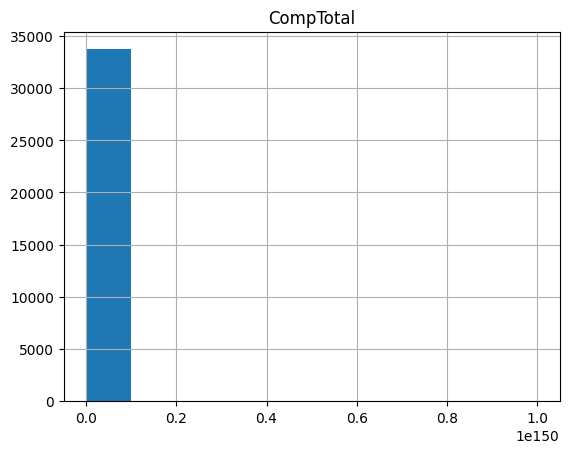

In [10]:
## Write your code here

table_name = 'main'
column_name = 'CompTotal' 

QUERY_COMPENSATION = f"""
SELECT {column_name}
FROM {table_name}
"""

df = pd.read_sql_query(QUERY_COMPENSATION, conn)
df.hist(column='CompTotal')

**Box Plots**

Plot a box plot of Age.


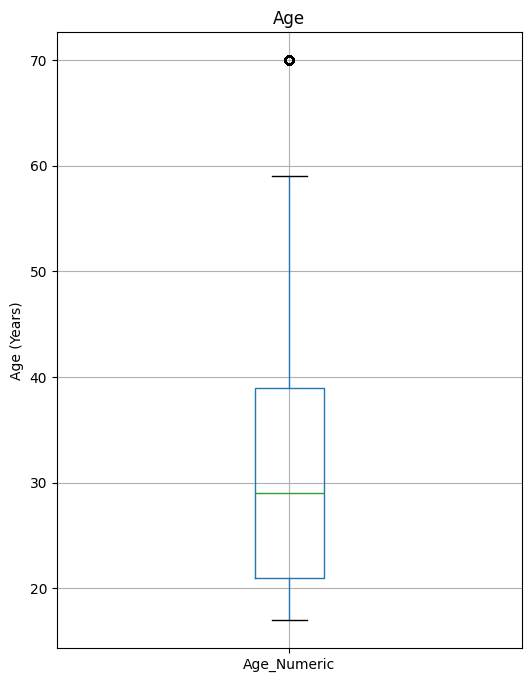

In [11]:
## Write your code here

table_name = 'main'
column_name = 'Age' 

QUERY = f"""
SELECT {column_name}
FROM {table_name}
"""

df = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df['Age_Numeric'] = df['Age'].map(age_mapping)


plt.figure(figsize=(6, 8))
df.boxplot(column='Age_Numeric')
plt.title('Age')
plt.ylabel('Age (Years)')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


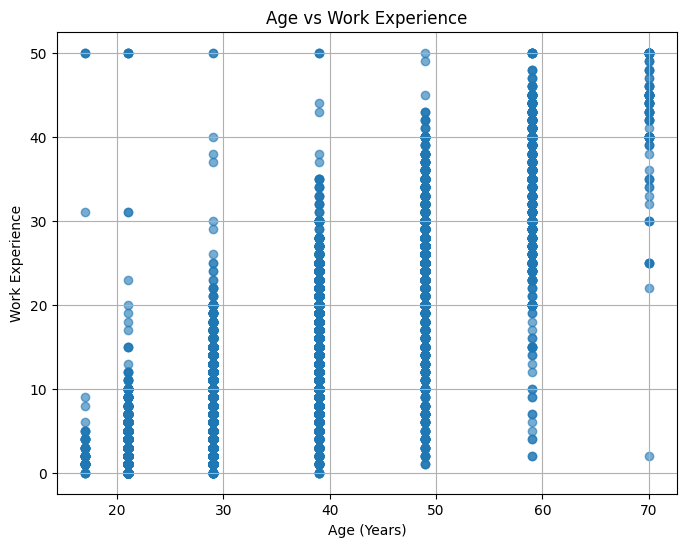

In [12]:
## Write your code here

QUERY = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df['Age_Numeric'] = df['Age'].map(age_mapping)


plt.figure(figsize=(8,6))
plt.scatter(df['Age_Numeric'], df['WorkExp'], alpha=0.6)
plt.xlabel("Age (Years)")
plt.ylabel("Work Experience")
plt.title("Age vs Work Experience")
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


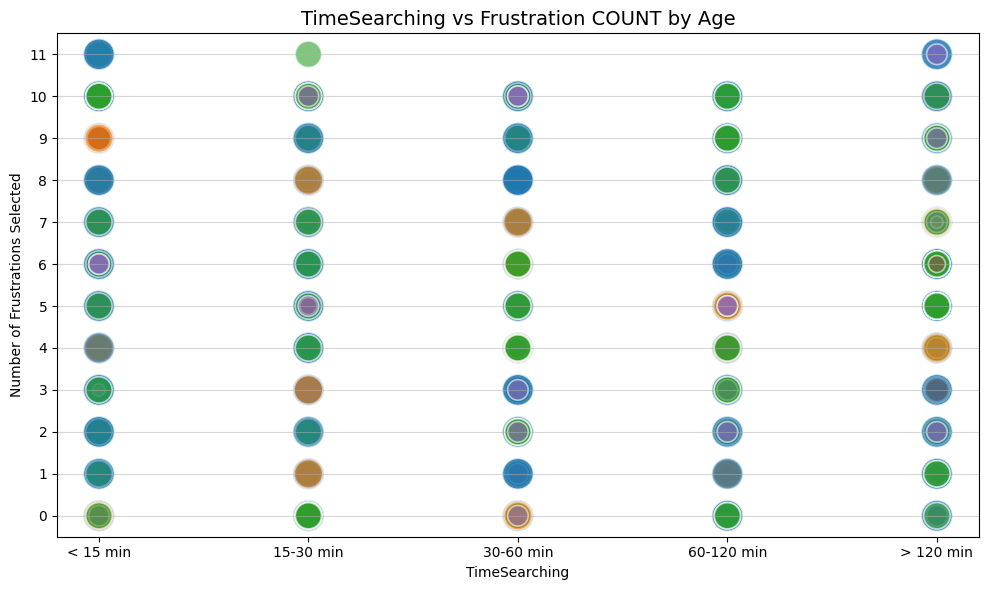

In [13]:
## Write your code here

import seaborn as sns
from pandas.api.types import CategoricalDtype

QUERY = """
SELECT TimeSearching, Frustration, Age FROM main
"""
df = pd.read_sql_query(QUERY, conn)


def count_frustrations(frustration_text):
    if pd.isna(frustration_text) or frustration_text in ['None', 'None of these']:
        return 0
    # Count the number of delimiters (semicolons) and add 1
    return len(frustration_text.split(';'))

df['Frustration_Count'] = df['Frustration'].apply(count_frustrations)


time_order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]


short_labels = [
    '< 15 min',
    '15-30 min',
    '30-60 min',
    '60-120 min',
    '> 120 min'
]

plot_df = df.dropna(subset=['TimeSearching', 'Age', 'Frustration_Count']).copy()

time_type = CategoricalDtype(categories=time_order, ordered=True)
plot_df['TimeSearching'] = plot_df['TimeSearching'].astype(time_type)



plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=plot_df, 
    x='TimeSearching', 
    y='Frustration_Count', 
    size='Age', 
    hue='Age', 
    alpha=0.6, 
    sizes=(10, 500),
    legend=False 
) 

# Y-Axis Ticks (Frustration Count)
max_count = plot_df['Frustration_Count'].max()
tick_locations = range(0, int(max_count) + 1, 1)

plt.yticks(ticks=tick_locations)
plt.ylim(-0.5, max_count + 0.5) 
plt.grid(True, axis='y', alpha=0.5)

# X-Axis Ticks (TimeSearching Fix)
plt.xticks(
    ticks=range(len(time_order)), 
    labels=short_labels,                
)

plt.title('TimeSearching vs Frustration COUNT by Age', size=14) 
plt.xlabel('TimeSearching', size=10) 
plt.ylabel('Number of Frustrations Selected', size=10)

plt.tight_layout() 
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


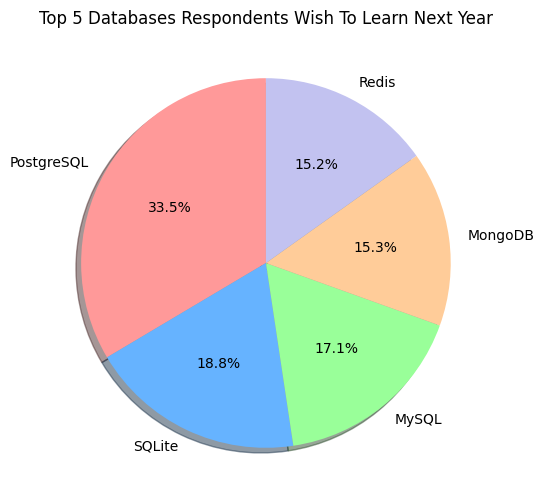

In [14]:
## Write your code here

QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

df = df.dropna()

df = df['DatabaseWantToWorkWith'].str.split(';').explode()

top5 = df.value_counts().head(5)

colors_list = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
top5.plot(
    kind='pie',
    figsize=(8, 6),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_list,
    shadow=True
)

plt.title('Top 5 Databases Respondents Wish To Learn Next Year')
plt.ylabel('')  # Remove default ylabel
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [15]:
QUERY = """
SELECT TimeSearching
FROM main
GROUP BY TimeSearching 
ORDER BY TimeSearching
"""
pd.read_sql_query(QUERY, conn)

,TimeSearching
0,None
1,15-30 minutes a day
2,30-60 minutes a day
3,60-120 minutes a day
4,Less than 15 minutes a day
5,Over 120 minutes a day


In [18]:
QUERY = """
SELECT TimeAnswering
FROM main
GROUP BY TimeAnswering 
ORDER BY TimeAnswering
"""
pd.read_sql_query(QUERY, conn)

,TimeAnswering
0,None
1,15-30 minutes a day
2,30-60 minutes a day
3,60-120 minutes a day
4,Less than 15 minutes a day
5,Over 120 minutes a day


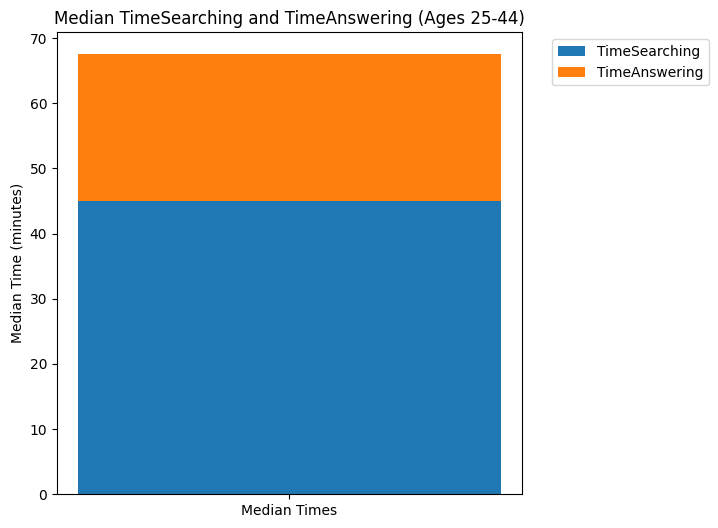

In [20]:
## Write your code here

QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Use the actual age groups that span 30 to 35
age_groups_to_include = ['25-34 years old', '35-44 years old']
df1 = df[df['Age'].isin(age_groups_to_include)].copy() # Filter and copy for safety

# -----------------------------------------------------------------
# 2. Time Mapping and Calculation
# -----------------------------------------------------------------
time_map = {
    "None": 0,
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}

# Map the text columns to their numeric equivalents
df1.loc[:, 'TimeSearching_Num'] = df1['TimeSearching'].map(time_map)
df1.loc[:, 'TimeAnswering_Num'] = df1['TimeAnswering'].map(time_map)

# Calculate the median for each new numeric column
medians = {
    'TimeSearching': df1['TimeSearching_Num'].median(),
    'TimeAnswering': df1['TimeAnswering_Num'].median()
}

# -----------------------------------------------------------------
# 3. Plotting the Stacked Bar Chart
# -----------------------------------------------------------------
plt.figure(figsize=(6,6))

# Plot TimeSearching (base of the stack)
plt.bar(
    ['Median Times'], 
    medians['TimeSearching'], 
    label='TimeSearching'
)

# Plot TimeAnswering, starting where TimeSearching ended (stacked)
plt.bar(
    ['Median Times'], 
    medians['TimeAnswering'],
    bottom=medians['TimeSearching'], 
    label='TimeAnswering'
)

plt.title('Median TimeSearching and TimeAnswering (Ages 25-44)', fontsize=12)
plt.ylabel('Median Time (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


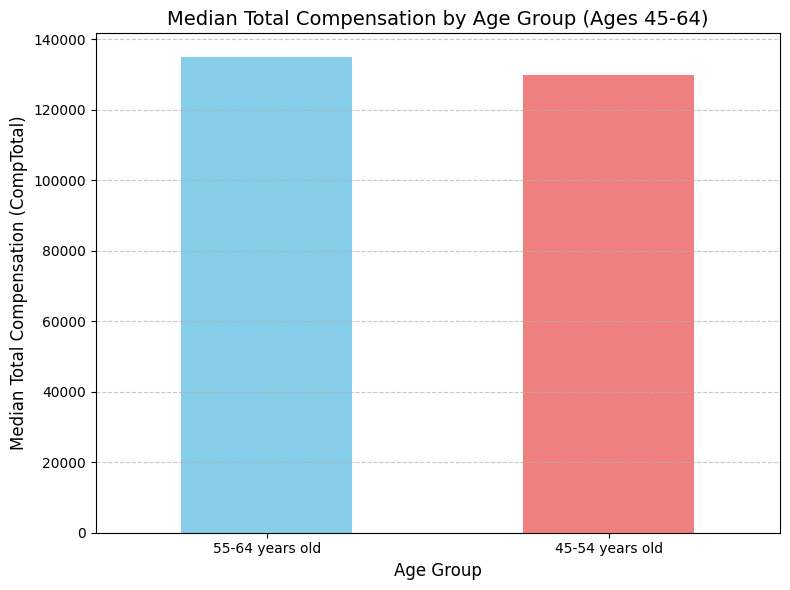

In [28]:
## Write your code here

# -----------------------------------------------------------------
# 1. SQL Extraction
# -----------------------------------------------------------------
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# -----------------------------------------------------------------
# 2. Filtering and Cleaning
# -----------------------------------------------------------------
# Define the age groups spanning 45 to 60
age_groups_to_include = ['45-54 years old', '55-64 years old']

# Filter the DataFrame to include only the target age groups
df_filtered = df[df['Age'].isin(age_groups_to_include)].copy()

# Remove rows where CompTotal is NaN, as median calculation requires valid numbers
df_cleaned = df_filtered.dropna(subset=['CompTotal'])

# -----------------------------------------------------------------
# 3. Aggregation
# -----------------------------------------------------------------
# Group by Age and calculate the median CompTotal for each group
median_comp = df_cleaned.groupby('Age')['CompTotal'].median().sort_values(ascending=False)

# -----------------------------------------------------------------
# 4. Visualization (Bar Chart)
# -----------------------------------------------------------------
plt.figure(figsize=(8, 6))

# Plot the median compensation using a bar chart
median_comp.plot(
    kind='bar',
    color=['skyblue', 'lightcoral'] # Use colors for visual distinction
)

plt.title('Median Total Compensation by Age Group (Ages 45-64)', fontsize=14)
plt.ylabel('Median Total Compensation (CompTotal)', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation = 0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


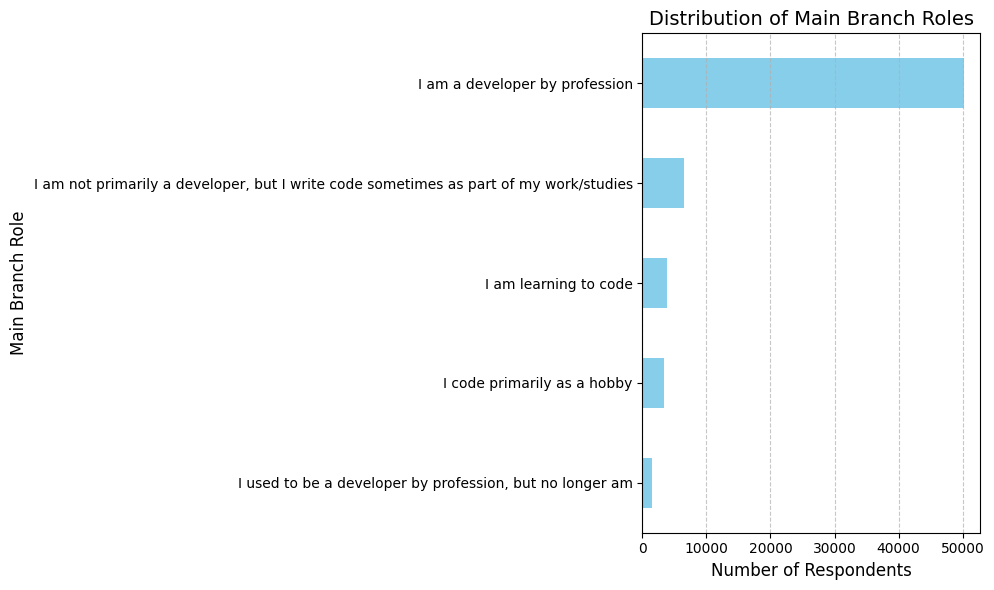

In [30]:
## Write your code here

# -----------------------------------------------------------------
# 1. SQL Extraction
# -----------------------------------------------------------------
QUERY = """
SELECT MainBranch
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# -----------------------------------------------------------------
# 2. Aggregation and Sorting
# -----------------------------------------------------------------
# Calculate the frequency of each role and sort them for plotting (ascending for a better looking barh chart)
main_branch_counts = df['MainBranch'].value_counts().sort_values(ascending=True)

# -----------------------------------------------------------------
# 3. Visualization (Horizontal Bar Chart)
# -----------------------------------------------------------------
plt.figure(figsize=(10, 6))

# Plot the horizontal bar chart directly from the Series
main_branch_counts.plot(
    kind='barh',
    color='skyblue'
)

# Add labels and title
plt.title('Distribution of Main Branch Roles', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Main Branch Role', fontsize=12)

# Add grid lines for horizontal axis readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout() # Ensures labels are not cut off
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [31]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
